# Hypothesis Testing

In statistics, we often ask whether a given sample agrees with a given model or hypothesis. For example, suppose we have data $\{x_i\}$ assumed to be drawn from a Gaussian distribution, $\mathcal{N}(\mu, \sigma)$. Here, $\mathcal{N}(\mu,\sigma)$ is our *null hypothesis*, and we are trying to *reject it* to show that we measured a particular effect. 
##### Example
>After examining a series of astronomical images, there appears to be a faint object that's reappearing in the same location, but it's unclear if it's just noise. To test our hypothesis, we take multiple images of this object over the course of many nights. 
>
>- Here, the *null hypothesis* is that the measured brightness of this supposed object is due to background noise - if we can reject it, we have a source detection.
>
>- The *alternative hypothesis* is the rejection of our null hypothesis; that is, that there is genuinely a point source in our image.
>
>- The contribution of the source flux to this object must be substantially larger than the background fluctuation to represent a reliable detection. 

Introducing the **p-value**! The p-value tells you the probability that your data could have occurred, assuming the null hypothesis is correct. It does this by calculating the likelihood of your test statistic, the number calculated by a statistical test using your data. The smaller the p-value, the more likely the alternative hypothesis is correct.

We typically adopt a threshold p-value known as the significance level $\alpha$, and we reject the null hypothesis when $p \leq \alpha$.

##### Example 
> We flip a coin eight times and get six tails; should we reject the hypothesis that the coin is fair? We will assume the null hypothesis that the coin is indeed fair. Recall that we can find probabilities of coin flips with the binomial distribution,
>
>$$ p(k|b,N) = \frac{N!}{k!(N-k)!} b^k (1-b)^{N-k}. $$
>
>Since p-values are defined as the probability that something *at least* as extreme as your data could have occurred (assuming the null hypothesis is correct), we can find the p-value by adding the probability of 6/8, 7/8, and 8/8 tails.
>
>$$ \frac{8!}{6!2!}\frac{1}{2}^6 \frac{1}{2}^2 + \frac{8!}{7!1!}\frac{1}{2}^7 \frac{1}{2}^1 + \frac{8!}{8!0!}\frac{1}{2}^8 \frac{1}{2}^0$$
>
>We get that the probability of this occurring is 0.145; thus, we cannot reject the null hypothesis at the 0.05 significance level.

When performing these tests, we are bound to make two types of errors,
- Type I: cases when the null hypothesis is true but incorrectly rejected (false positives).
- Type II: Cases when the null hypothesis is false but is accepted (false negative).

Hypothesis testing is intimately related to comparisons of distributions, discussed further below. Also, be aware that the classical approach to hypothesis testing is not identical to the Bayesian approach.

### Simple classification and completeness vs. contamination trade-off

By decreasing $\alpha$, the number of false positives decreases, and the number of false negatives increases. Thus, there is a trade-off when it comes to finding the optimal value of $\alpha$, which depends on the particular problem and the relative importance of false negatives and positives.

##### Example: 
>If the null hypothesis is "this airplane is safe to fly," we would much rather have false positives (the airplane is safe to fly, but we reject it as bad) than false negatives (the airplane is not safe to fly but we accept it as good).
>
> Imagine we are sorting through a pile containing gold and pyrite (a rock similar in appearance to gold but sells for a small fraction of the price, also known as "fool's gold"). If the null hypothesis is "This piece is real gold," we would rather have false negatives (accepting a piece of pyrite into the gold pile) than false positives (rejecting a valuable piece of gold).


When we perform multiple cases of hypothesis testing, the fraction of false positives can significantly exceed the value of $\alpha$. The fraction of false positives depends not only on $\alpha$ and the number of data points but also on the number of true positives (the latter is proportional to the number of instances when an alternative hypothesis is true). We shall illustrate these trade-offs with an example.

It's common that the underlying distribution from which data $\{x_i\}$ were drawn, $h(x)$, is a sum of two populations

$$ \qquad\qquad\qquad h(x) = (1-a)\: h_B(x)+ah_S(x), \qquad\qquad\qquad (1)$$

where $a$ is the relative normalization factor (note that the integrals of $h_B$ and $h_S$ are normalized to 1). In this example, there is a null hypothesis ($B$, for background) but also a specific alternative hypothesis ($S$, for source). Given $\{x_i\}$, we want to assign to each individual measurement $x_i$ the probability that it belongs to population $S$, $p_S(x_i)$ (note that $p_B(x_i) = 1 - p_S(x_i)$ as there are only these two possibilities). The size of sample $\{x_i\}$ is $N$, and thus the number of true sources in the sample $Na$. 

A simplified version of this problem is **classification**, where we assign the class $S$ or $B$ without retaining the knowledge of the actual probability $p_S$. In order for classification based on $x$ to be possible at all, $h_B(x)$ and $h_S(x$) must be different.

If we choose a classification boundary value $x_c$, then the expected number of false positive sources (Type I errors) in the sample $Na$ is

$$ n_\text{ false positive} = N (1-a) \int^\infty_{x_c}h_B(x) dx \equiv N(1-a) \alpha , $$

and the number of false negatives sources, or Type II errors, is

$$n_\text{ false negative} = Na\int^{x_c}_0 h_s(x)dx \equiv Na\beta. $$

The number of instances when the null hypothesis is rejected (i.e., the number of instances classified as a source) is,

$$n_\text{ source} = Na-n_\text{ false negative}+n_\text{ false positive}.$$

The sample **completeness** is defined as

$$ \eta = \frac{Na-n_\text{ false negative}}{Na} = 1 -\int^{x_c}_0 h_S(x)dx, $$

with 0 $ \leq \eta \leq $ 1, and the sample contamination, also known as the **false discovery rate (FDR)**, is defined as

$$\epsilon = \frac{n_\text{ false positive}}{n_\text{ source}}, $$

with 0 $\leq \epsilon \leq 1$ (the 1 - $\epsilon$ rate is sometimes called classification efficiency). Essentially, as $x_c$ increases, the sample contamination decreases; this is good! However, simultaneously, completeness decreases as well; this is bad. This trade-off can be evaluated using the **receiver operating characteristic (ROC) curve**, a plot of the fraction of true positives vs. the fraction of true negatives. The position along the ROC curve is parametrized by $x_c$, and the area under the ROC curve, sometimes called the $c$ statistic, can be used to quantify the overall performance of the classification method. The question remains: how do we choose an optimal value of $x_c$?

##### Example
>
>Assume that $h_B(x) = \mathcal{N} (\mu = 100, \sigma = 10) $ and $h_s(x) = \mathcal{N} (\mu = 150, \sigma = 12)$, with $a$ = 0.1 and $N = 10^6$ (this will be image with 1000 x 1000 resolution elements; the $x$ values correspond to the sum of background and source counts). We will plot these two distributions below.
>
>If we naively choose $x_c$=120 (a "$2\sigma$ cut” away from the mean for $h_B$, corresponding to a Type I error probability of $\alpha$ = 0.024), **21,600 values will be incorrectly classified as a source!** The sample completeness for this value of $x_c$ is 0.994 and **99,400 values are correctly classified as a source.** Although the Type I error rate is only 0.024, the sample contamination is 21,600/(21,600+99,400) = 0.179, or over 7 times higher!

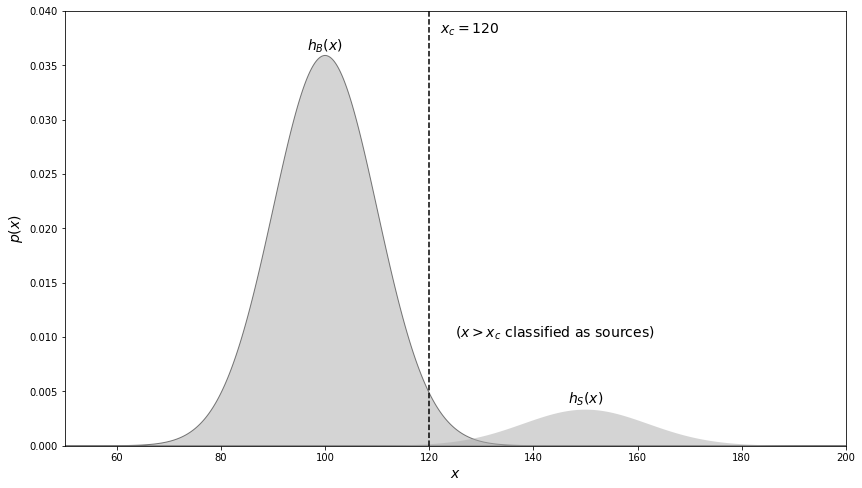

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

# Generate and draw the curves
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

# plot the distributions
fig, ax = plt.subplots(figsize=(14, 8))
ax.fill(x, p1, ec='k', fc='#AAAAAA', alpha=0.5)
ax.fill(x, p2, '-k', fc='#AAAAAA', alpha=0.5)

# plot x_c = 120
ax.plot([120, 120], [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', va='bottom', fontsize = 14)
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', va='bottom', fontsize = 14)
ax.text(122, 0.039, r'$x_c=120$', ha='left', va='top', fontsize = 14)
ax.text(125, 0.01, r'$(x > x_c\ {\rm classified\ as\ sources})$', fontsize = 14)

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$', fontsize = 14)
ax.set_ylabel('$p(x)$', fontsize = 14)
plt.show()

This result that $\epsilon \gg \alpha$ is a consequence of the fact that the true population contains nine times as many background values as it contains sources ($a$= 0.1).

In order to decrease the expected contamination level $\epsilon$, we need to increase $x_c$, but the optimal value depends on $a$. Since $a$ is often unknown in practice, choosing $x_c$ is not straightforward. A simple, practical method for selecting the optimal value of $x_c$ for a given desired $\epsilon$ (or FDR) was proposed by Benjamini and Hochberg.


The Benjamini and Hochberg method assumes that measurements can be described by eq. (1) and makes an additional assumption that $h_B(x)$ is known (e.g., when $a$ is small, it is possible to isolate a portion of an image to measure background count distribution). Given $h_B(x)$, and its cumulative counterpart $H_B(x)$, it is possible to assign a $p$ value to each value in $\{x_i\}$ as $p_i = 1 - H_B(x_i)$, and sort the sample so that $p_i$ are increasing. If all $\{x_i\}$ values were drawn from $h_B(x)$, the differential distribution of these $p_i$ values would be a uniform distribution by construction, and its cumulative distribution, $1 \leq C_i \leq N$, would increase linearly as

$$C_i^B = Np_i$$

Instead, for $Na$ cases in the adopted model the null hypothesis is false and they will result in an excess of small $p_i$ values; hence, the observed cumulative distribution, $C_i = C(p_i) = i$, will have values much larger than $C_i^B$ for small $p$. Benjamini and Hochberg realized that this fact can be used to find a classification threshold $p_c$ (and the corresponding $x_c$ and its index $i_c = C(p_c)$; recall that the sample is sorted by $p_i$) that guarantees that the sample contamination $\epsilon$ is below some desired value $\epsilon_0$. Their proposal for finding $p_c$ is elegant and does not require involved computations: assume that the null hypothesis is rejected for all values $p_i \leq p_c$, resulting in a subsample of $i_c = C(p_c)$ values (i.e., these $i_c$ values are selected as sources). The number of cases when the null hypothesis was actually true and falsely rejected is $(1 - a)Np_c < Np_c$, and thus the contamination rate is

$$ \epsilon = \frac{(1-a)Np_c}{i_c} < \frac{Np_c}{i_c}$$

Therefore, the threshold value must satisfy

$$ \qquad\qquad\qquad\qquad i_c < N\frac{p_c}{\epsilon_0} \qquad\qquad\qquad\qquad (2) $$

This condition corresponds to the intersection of the measured $C_i(p_i)$ curve and the straight line $C = Np/\epsilon_0$, and the algorithm is to find the largest value of $i (= Ci)$ which satisfies the eq. $(2)$.

Below, we will illustrate the Benjamini and Hochberg method for $10^6$ points drawn from the distribution shown in our previous figure.

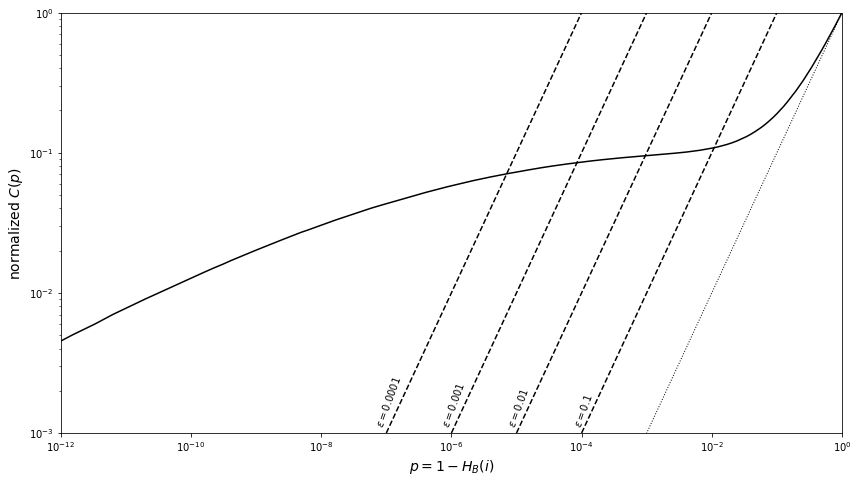

In [2]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Set up the background and foreground distributions
background = norm(100, 10)
foreground = norm(150, 12)
f = 0.1

# Draw from the distribution
np.random.seed(42)
N = int(1E6)
X = np.random.random(N)
mask = (X < 0.1)
X[mask] = foreground.rvs(np.sum(mask))
X[~mask] = background.rvs(np.sum(~mask))

#------------------------------------------------------------
# Perform Benjamini-Hochberg method
p = 1 - background.cdf(X)
p_sorted = np.sort(p)

# plot the results
fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(bottom=0.15)
ax = plt.axes(xscale='log', yscale='log')

# only plot every 1000th; plotting all 1E6 takes too long
ax.plot(p_sorted[::1000], np.linspace(0, 1, 1000), '-k')
ax.plot(p_sorted[::1000], p_sorted[::1000], ':k', lw=1)

# plot the cutoffs for various values of expsilon
p_reg_over_eps = 10 ** np.linspace(-3, 0, 100)
for (i, epsilon) in enumerate([0.1, 0.01, 0.001, 0.0001]):
    x = p_reg_over_eps * epsilon
    y = p_reg_over_eps
    ax.plot(x, y, '--k')

    ax.text(x[1], y[1],
            r'$\epsilon = %.1g$' % epsilon,
            ha='center', va='bottom', rotation=70)

ax.xaxis.set_major_locator(plt.LogLocator(base=100))

ax.set_xlim(1E-12, 1)
ax.set_ylim(1E-3, 1)

ax.set_xlabel('$p = 1 - H_B(i)$', fontsize = 14)
ax.set_ylabel('normalized $C(p)$', fontsize = 14)

plt.show()

The solid line shows the cumulative distribution of observed p values, normalized by the sample size. The dashed lines show the cutoff for various limits on contamination rate $\epsilon$ computed using eq. $(2)$ (the accepted measurements are those with p smaller than that corresponding to the intersection of solid and dashed curves). The dotted line shows how the distribution would look in the absence of sources. 

Note that $p_c < \epsilon_0$ because $i_c < N$; if one naively adopted $p_c = \epsilon_0$, the resulting expected sample contamination would be a factor of $N/i_c$ larger than $\epsilon_0$.
The Benjamini and Hochberg algorithm is conservative because it assumes that $(1 - a) \approx 1$ when deriving the upper bound on $\epsilon$. Hence, the resulting contamination rate $\epsilon$ is a factor of $(1 - a)$ smaller than the maximum allowed value $\epsilon$. If we knew $a$, we could increase $i_c$ given by eq. $(2)$ by a factor of $1/(1 - a)$, thus increasing the sample completeness while guaranteeing that the sample contamination does not exceed $\epsilon_0$.
In cases where one can assume that large values of $p$ (say, for $p$ > 0.5) are dominated by the null hypothesis, which is often the case, the cumulative distribution is

$$C(p_i) = Na+N(1-a)p_i \text{ for } p_i > 0.5$$

with, say, $C(p_i=0.5) = C_{0.5}$. Given that the slope of this line is $2(N − C_{0.5})$, the number of cases when the null hypothesis is true but falsely rejected can be estimated as $2(N - C_{0.5})p_c$. This estimate amounts to scaling $h_B(x)$ to fit the observed distribution or, equivalently, estimating $(1−a)$ as

$$ \lambda^{-1} \equiv 1-a = 2\bigg(1-\frac{C_{0.5}}{N}\bigg) $$

Thus, the Benjamini and Hochberg method can be improved by multiplying $i_c$ by $\lambda$, yielding the sample completeness increased by a factor $\lambda$. We can look back at the graph above and find that the value of the cumulative distribution at $p$ = 0.5 is 0.55, which yields a correction factor $\lambda$ = 1.11.